# Problem set 8

## Name: Baite Pang

## Link to your PS8 github repo: 

### Problem 0 

-2 points for every missing green OK sign. 

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


## Problem 1

One ML algorithm we didn't cover during class is the nearest neighbor algorithm. The principle behind nearest neighbors is to base your prediction for a given point on the true labels of a predefined number of training samples closest to that point in the feature space. The predicted label is some sort of average of the true labels of the nearest neighbors. The number of nearest neighbors is a user-defined constant (k-nearest neighbor learning) which is one of the hyperparameters you'll need to tune. 

The challenge in this technique is the distance metric. How do you measure the distance between two points in the feature space? This is non-trivial question because usually different continuous features have different units and order of magnitudes, some features are one-hot-encoded, some features are ordinal. The key to successfully apply this method is usually to create a custom distance metric tailored to your dataset. However the standard Euclidean (geometric) distance is often used after the features are standard scaled.

**(This is not necessary to know, but is still interesting)** The nearest-neighbor algorithm is unique because there is no model to train. The algorithm merely stores the training data in memory, and then checks which training points are closest to a given prediction point. This makes the nearest-neighbor algorithm train in O(1) time, but predict in O(n) time (with n referring to the number of **training** points, not testing). Generally, this is the opposite of what we want in an ML model -- it's much better to spend time precomputing than it is to spend time while predicting. Regardless, nearest-neighbors is still a very useful algorithm in some circumstances!

Read more about this method [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) and [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression).

### Problem 1a (10 points)

In this problem, we will implement nearest neighbor regression. Read the manual of KNeighborsRegressor. Let's study how the `n_neighbors` parameter impacts the prediction.

Please recreate the toy regression dataset from the lecture notes (Lecture 16, SVM regression) with n_samples = 30. Split the data into train and validation (70-30). Train models with n_neighbors = 1 to 10. Plot the train and validation scores using an evaluation metric of your choice as a function of n_neighbors.

Next, visualize the models by creating more plots that display the train/val points with different colors, the true function, and the model predictions for the various n_neighbors values. Use trained models with n_neighbors = [1,3,10,30]. You will encounter an error message. Why? How do you fix it? Explain in a paragraph!

Answer the following questions and explain your answer. 
   - What `n_neighbors` value produces a high bias (low variance) model? What `n_neighbors` value produces a high variance (low bias) model? How do overfitting and underfitting show up in the models?
   - How does the model behave with respect to outliers?
   - Explain why the model prediction is a step function and how this step function differs from a decision tree step function!

Based on the manual, what other parameter has a strong influence on the predictions? Prepare another figure to prove your point. 

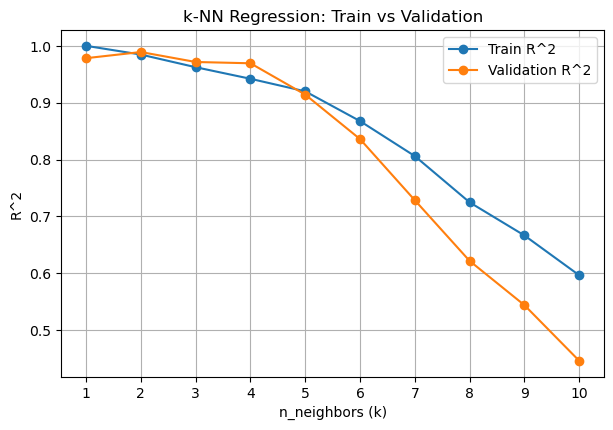

In [9]:
# your code here
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
np.random.seed(10)

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30
X = np.random.rand(n_samples).reshape(-1, 1)   
y = true_fun(X.ravel()) + np.random.randn(n_samples) * 0.1


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=42
)


ks = range(1, 11)
train_scores, val_scores = [], []

for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    train_scores.append(r2_score(y_train, model.predict(X_train)))
    val_scores.append(r2_score(y_val, model.predict(X_val)))


plt.figure(figsize=(7, 4.5))
plt.plot(list(ks), train_scores, marker="o", label="Train R^2")
plt.plot(list(ks), val_scores, marker="o", label="Validation R^2")
plt.xlabel("n_neighbors (k)")
plt.ylabel("R^2")
plt.title("k-NN Regression: Train vs Validation")
plt.xticks(list(ks))
plt.grid(True)
plt.legend()
plt.show()


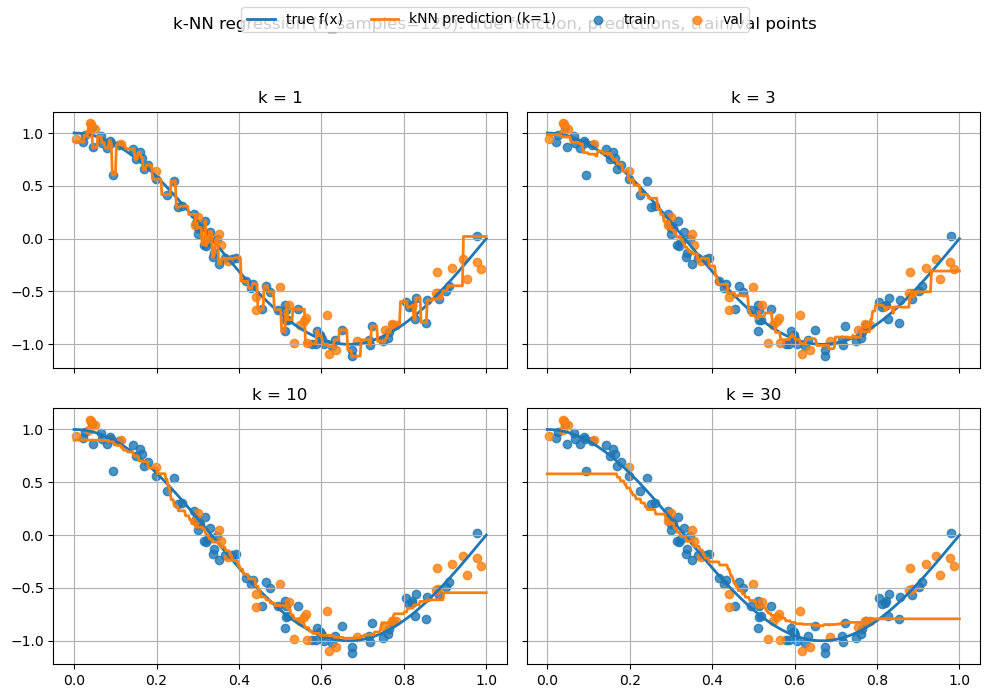

In [13]:
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 120          # increased from 30 to 120
X = np.random.rand(n_samples).reshape(-1, 1)
y = true_fun(X.ravel()) + np.random.randn(n_samples) * 0.1

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=42
)


ks = [1, 3, 10, 30]
X_grid = np.linspace(0.0, 1.0, 400).reshape(-1, 1)
y_true_grid = true_fun(X_grid.ravel())

fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.ravel()

for ax, k in zip(axes, ks):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_grid = model.predict(X_grid)


    ax.plot(X_grid.ravel(), y_true_grid, linewidth=2, label="true f(x)")
    ax.plot(X_grid.ravel(), y_pred_grid, linewidth=2, label=f"kNN prediction (k={k})")

    ax.scatter(X_train.ravel(), y_train, alpha=0.8, label="train")
    ax.scatter(X_val.ravel(), y_val, alpha=0.8, label="val")

    ax.set_title(f"k = {k}")
    ax.grid(True)


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4)
fig.suptitle("k-NN regression (n_samples=120): true function, predictions, train/val points")
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


Error: Expected n_neighbors <= n_samples_fit, but n_neighbors = 30, n_samples_fit = 21, n_samples = 21

why: KNeighborsRegressor needs at least n_neighbors points in the training set. With n_samples=30 and a 70/30 split, the training set has 21 points. Trying n_neighbors=30 raises:

FIX:
Increase total samples so that the number of train number train size = 84 > 30 which satisfies n_neighbors <= n_samples_fit.

**your explanation here**

1. High variance (low bias): k = 1; it memorizes local noise → great train score, worse validation (overfitting).
High bias (low variance): large k such as k=30; it oversmooths toward an average → mediocre train/val scores (underfitting).

2. Outliers: Small k makes predictions very sensitive to outliers near the query point; large 𝑘 dilutes their effect by averaging over more 
neighbors.

3. k-NN regression is piecewise constant because the set of 𝑘 nearest neighbors is unchanged within regions, so the average label stays constant (steps).
Decision-tree steps come from fixed, learned axis-aligned splits; k-NN steps come from data geometry (nearest-neighbor regions) and shift with the test point.

### Problem 1b (5 points)

Next, we'll implement the nearest neighbors algorithm for a classification problem! Please import KNeighborsClassifier and read the manual. Let's study how the `n_neighbors` parameters impact the prediction.

Please recreate the toy classification dataset from the lecture notes (Lecture 16, SVM classification, make_moons dataset). 

Prepare a plot that shows predictions for n_neighbors = 1, 10, 30, and 100. Prepare the plots yourself in the notebook using matplotlib or seaborn.

Explain in a paragraph when KNeighborsClassifier underfits and overfits. You can either make an argument based on the figures you prepared or you can split the dataset to train/val (70-30), train models, calculate the train and validation scores using an evaluation metric of your choice, and plot the scores. 


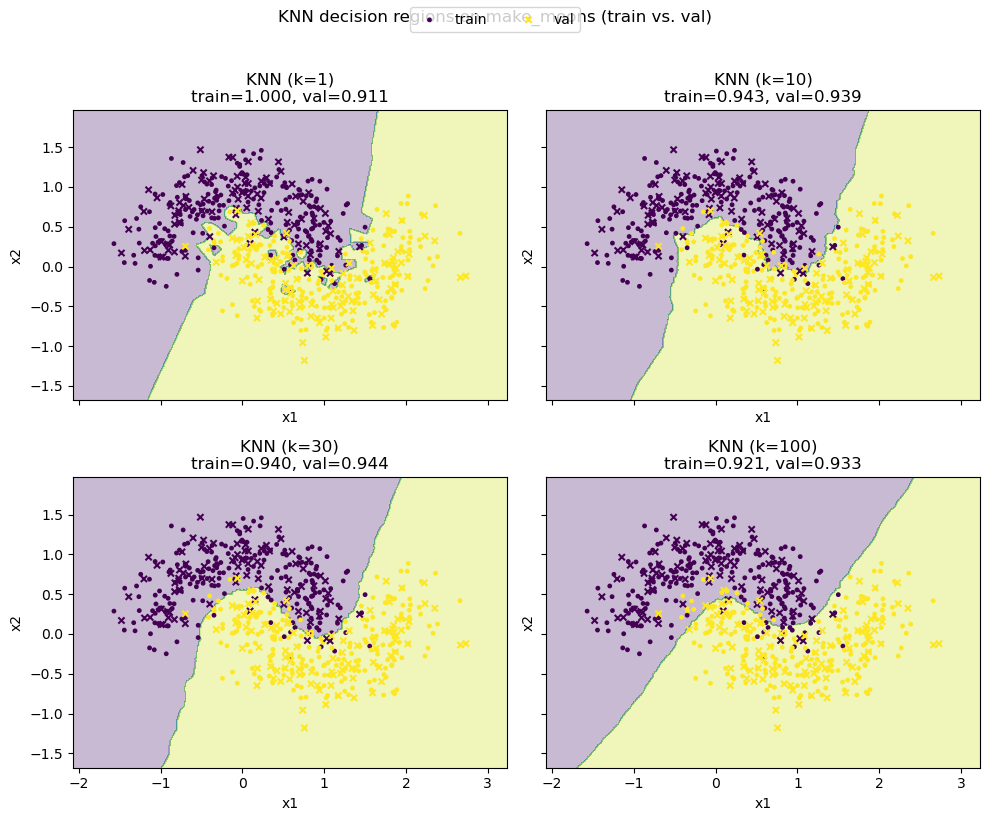

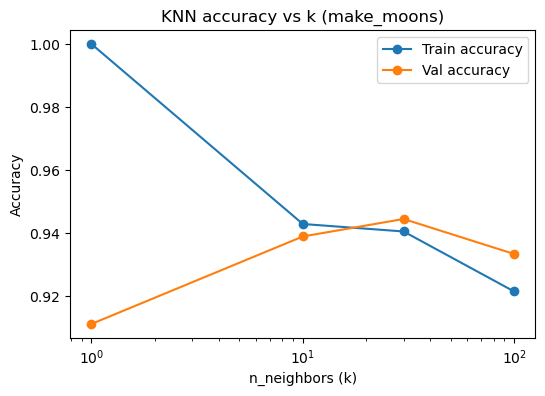

[(1, 1.0, 0.9111111111111111), (10, 0.9428571428571428, 0.9388888888888889), (30, 0.9404761904761905, 0.9444444444444444), (100, 0.9214285714285714, 0.9333333333333333)]


In [ ]:
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(noise=0.25, random_state=1, n_samples=600)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

ks = [1, 10, 30, 100]
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.ravel()

train_accs, val_accs = [], []

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400),
)

for ax, k in zip(axes, ks):
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    tr = accuracy_score(y_train, clf.predict(X_train))
    va = accuracy_score(y_val, clf.predict(X_val))
    train_accs.append(tr)
    val_accs.append(va)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=12, label="train", edgecolors="none")
    ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, s=20, marker="x", label="val")

    ax.set_title(f"KNN (k={k})\ntrain={tr:.3f}, val={va:.3f}")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2)
fig.suptitle("KNN decision regions on make_moons (train vs. val)", y=1.02)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
plt.plot(ks, train_accs, marker="o", label="Train accuracy")
plt.plot(ks, val_accs, marker="o", label="Val accuracy")
plt.xscale("log")
plt.xlabel("n_neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN accuracy vs k (make_moons)")
plt.legend()
plt.show()

print(list(zip(ks, train_accs, val_accs)))


**your explanation here**

KNeighborsClassifier overfits when (k) is very small (k=1): the classifier builds a highly wiggly decision boundary that follows noise. You’ll see near-perfect train accuracy but a lower validation accuracy, and decision regions that change around isolated points. As (k) increases, predictions average over more neighbors, smoothing the boundary and reducing variance. When (k) becomes too large, the model underfits: the boundary becomes overly smooth and can’t capture class curvature or local structure, so both train and validation accuracies drop. On the make_moons example, this shows up as: (k=1) → high train/ lower val (overfit); moderate k=30 → best validation (good bias-variance trade-off); very large k=100 → smoother but worse train/val (underfit).


## Problem 2

Let's play around with more algorithms! In this problem, you will work with the diabetes dataset and try different ML algorithms to figure out which one is the best. Whenever you work with a new dataset, you want to try as many algorithms on it as possible because you can't know in advance which algorithm (and hyperparameters) will be the best.

Generally you need to decide five things when you build an ML pipeline:
- your splitting strategy
- how to preprocess the data
- what evaluation metric you'll use
- what ML algorithms you will try
- what paramater grid you should use for each ML algorithm

You'll write a function in problem 2a that takes a preprocessor, an ML algorithm, and its corresponding parameter grid as inputs and it will calculate test scores and return the best models. The splitting strategy and the evaluation metric are not inputs to this function but predefined.

### Problem 2a (15 points)

Write a function which takes the unprocessed feature matrix, target variable, a preprocessor (ColumnTransformer), an initialized ML algorithm, and a corresponding parameter grid as inputs. Do the following inside the function:
 1. split the data to other and test (80-20) and then use KFold with 4 folds
 2. preprocess the data and perform cross validation (I recommend you use GridSearchCV)
 3. Finally, calculate the test score. Use RMSE as your evaluation metric. 
 
 Repeat this 10 times for 10 different random states, and the function should return the 10 best models and the 10 test scores. Returning multiple models and test scores ensures that a machine learning model works similarly despite different random states. 
 
 The skeleton of the function is provided for convenince.

The function name contains the splitting strategy and the evaluation metric (i.e., `MLpipe_KFold_RMSE`). It would be difficult (but not impossible) to write a general `MLpipe` function that takes a splitter and an evaluation metric also as inputs for two reasons:
- some splitters are difficult to pass as a function argument (e.g., two train_test_split steps, or a train_test_split combined with a KFold),
- some evaluation metrics need to be maximized (like accuracy, R2, f_beta), while others need to be minimized (like logloss, RMSE) and the code for these two options differ.

For now, I recommend that if you need to try multiple ML algorithms, write a function that's specific to a splitting strategy and an evaluation metric and add a description to the function as shown in MLpipe_KFold_RMSE. Such functions make it very easy to try many ML algorithms on your dataset and I recommend you write a similar function for your project.

Add plenty of test and print statements to make sure your code works correctly and it does what you expect it to do. You are encouraged to: print the sets and their shapes before and after preprocessing, print the GridSearchCV results, print the test scores, and more.

Test the function with linear regression models that use l1 regularization. Fix any warnings you might encounter. Print out the mean and the standard deviation of the test scores.

In [26]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import Lasso

In [ ]:
# read in the dataset as a dataframe
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t')

# create target series and feature matrix 
y = df['Y']
X = df.loc[:, df.columns != 'Y']

def neg_rmse(y_true, y_pred):
    return -np.sqrt(mean_squared_error(y_true, y_pred))

neg_rmse_scorer = make_scorer(neg_rmse)

# function for the ML pipeline as outlined above 
def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.

    You should:

    1. Loop through 10 different random states
    2. Split your data 
    3. Fit a model using GridSearchCV with KFold and the predefined Preprocessor 
    4. Calculate the model's error on the test set 
    5. Return a list of 10 test scores and 10 best models 
    '''
    
    # lists to be returned 
    test_scores = []
    best_models = []

    random_states = list(range(10))
    for run_idx, rs in enumerate(random_states, 1):
        print(f"[Run {run_idx}/10] random_state={rs}")

        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.20, random_state=rs
        )
        print(f"Shapes (pre-preprocess): X_other={X_other.shape}, X_test={X_test.shape}")

        pipe = Pipeline([
            ("preprocess", preprocessor),
            ("model", ML_algo),
        ])
        kf = KFold(n_splits=4, shuffle=True, random_state=rs)

        gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            scoring=neg_rmse_scorer,  
            cv=kf,
            n_jobs=-1,
            refit=True,
            verbose=0,
            error_score="raise"
        )
        gs.fit(X_other, y_other)

        print(f"Best params: {gs.best_params_}")
        print(f"Best CV (NEG RMSE): {gs.best_score_:.6f}  ->  CV RMSE={-gs.best_score_:.6f}")


        best_pipe = gs.best_estimator_
        y_pred_test = best_pipe.predict(X_test)
        test_rmse = float(np.sqrt(mean_squared_error(y_test, y_pred_test)))
        print(f"Test RMSE: {test_rmse:.6f}")

        test_scores.append(test_rmse)
        best_models.append(best_pipe)

    return test_scores, best_models

In [41]:
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
y = df["Y"]
X = df.drop(columns=["Y"])

preprocessor = ColumnTransformer(
    [("num", StandardScaler(), X.columns.tolist())],
    remainder="drop"
)

lasso = Lasso(max_iter=10000)
param_grid = {"model__alpha": np.logspace(-4, 1, 10)}  

test_scores, best_models = MLpipe_KFold_RMSE(X, y, preprocessor, lasso, param_grid)


print("Test RMSE across 10 runs:")
print(np.round(test_scores, 6))
print(f"Mean RMSE: {np.mean(test_scores):.6f}")
print(f"Std  RMSE: {np.std(test_scores, ddof=1):.6f}")


[Run 1/10] random_state=0
Shapes (pre-preprocess): X_other=(353, 10), X_test=(89, 10)
Best params: {'model__alpha': np.float64(0.7742636826811278)}
Best CV (NEG RMSE): -55.040869  ->  CV RMSE=55.040869
Test RMSE: 58.491104
[Run 2/10] random_state=1
Shapes (pre-preprocess): X_other=(353, 10), X_test=(89, 10)
Best params: {'model__alpha': np.float64(2.782559402207126)}
Best CV (NEG RMSE): -54.929675  ->  CV RMSE=54.929675
Test RMSE: 55.173784
[Run 3/10] random_state=2
Shapes (pre-preprocess): X_other=(353, 10), X_test=(89, 10)
Best params: {'model__alpha': np.float64(0.7742636826811278)}
Best CV (NEG RMSE): -54.443310  ->  CV RMSE=54.443310
Test RMSE: 55.681828
[Run 4/10] random_state=3
Shapes (pre-preprocess): X_other=(353, 10), X_test=(89, 10)
Best params: {'model__alpha': np.float64(0.7742636826811278)}
Best CV (NEG RMSE): -54.152157  ->  CV RMSE=54.152157
Test RMSE: 55.926994
[Run 5/10] random_state=4
Shapes (pre-preprocess): X_other=(353, 10), X_test=(89, 10)
Best params: {'model__a

### Problem 2b (15 points)

Next, train the following models on the diabetes dataset:
- linear regression with l1 regularization (already completed in 2a)
- linear regression with l2 regularization 
- linear regression with an elastic net 
- RF
- SVR
- k nearest neighbor regression

Please determine what the parameter grid should be for each of these methods. Follow the guidance we discussed during the lecture.

Make sure your code is reproducable! When you rerun it, you should get back the exact same test scores and best hyperparameters in each run. So fix your random states where ever necessary.

Which algorithm is the best on the diabetes dataset based on the mean and standard deviation of the test scores? Write a paragraph or two and describe your findings. 

In [46]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [48]:
# your code here
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
y = df["Y"]
X = df.drop(columns=["Y"])

# --- preprocessor (all numeric -> standardize) ---
preprocessor = ColumnTransformer(
    [("num", StandardScaler(), X.columns.tolist())],
    remainder="drop"
)


lasso = Lasso(max_iter=10000)
grid_lasso = {"model__alpha": np.logspace(-4, 1, 10)}

ridge = Ridge(max_iter=10000, random_state=123)
grid_ridge = {"model__alpha": np.logspace(-4, 3, 12)}

enet = ElasticNet(max_iter=10000, random_state=123)
grid_enet = {"model__alpha": np.logspace(-4, 1, 8),
             "model__l1_ratio": np.linspace(0.05, 0.95, 10)}

rf = RandomForestRegressor(random_state=123, n_jobs=-1)
grid_rf = {
    "model__n_estimators": [300, 600],
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_leaf": [1, 2, 5],
    "model__max_features": ["sqrt", "log2", None, 0.5],
    "model__bootstrap": [True],
    "model__random_state": [123],  
}

svr = SVR(kernel="rbf")
grid_svr = {"model__C": np.logspace(-2, 3, 8),
            "model__gamma": ["scale", "auto"] + list(np.logspace(-4, 0, 5)),
            "model__epsilon": np.logspace(-3, 0, 5)}

knn = KNeighborsRegressor()
grid_knn = {"model__n_neighbors": list(range(1, 51, 2)),
            "model__weights": ["uniform", "distance"],
            "model__p": [1, 2]}


results = {}
for name, algo, grid in [
    ("Lasso (L1)", lasso, grid_lasso),
    ("Ridge (L2)", ridge, grid_ridge),
    ("Elastic Net", enet, grid_enet),
    ("Random Forest", rf, grid_rf),
    ("SVR (RBF)", svr, grid_svr),
    ("KNN Regressor", knn, grid_knn),
]:
    scores, models = MLpipe_KFold_RMSE(X, y, preprocessor, algo, grid)
    results[name] = {
        "scores": scores,
        "mean_rmse": float(np.mean(scores)),
        "std_rmse": float(np.std(scores, ddof=1)),
        "models": models,
    }

summary = pd.DataFrame({
    "Model": list(results.keys()),
    "Mean RMSE": [results[k]["mean_rmse"] for k in results],
    "Std RMSE": [results[k]["std_rmse"] for k in results],
}).sort_values(by="Mean RMSE")

print("\n=== Problem 2b — RMSE Summary (lower is better) ===")
print(summary.to_string(index=False))

[Run 1/10] random_state=0
Shapes (pre-preprocess): X_other=(353, 10), X_test=(89, 10)
Best params: {'model__alpha': np.float64(0.7742636826811278)}
Best CV (NEG RMSE): -55.040869  ->  CV RMSE=55.040869
Test RMSE: 58.491104
[Run 2/10] random_state=1
Shapes (pre-preprocess): X_other=(353, 10), X_test=(89, 10)
Best params: {'model__alpha': np.float64(2.782559402207126)}
Best CV (NEG RMSE): -54.929675  ->  CV RMSE=54.929675
Test RMSE: 55.173784
[Run 3/10] random_state=2
Shapes (pre-preprocess): X_other=(353, 10), X_test=(89, 10)
Best params: {'model__alpha': np.float64(0.7742636826811278)}
Best CV (NEG RMSE): -54.443310  ->  CV RMSE=54.443310
Test RMSE: 55.681828
[Run 4/10] random_state=3
Shapes (pre-preprocess): X_other=(353, 10), X_test=(89, 10)
Best params: {'model__alpha': np.float64(0.7742636826811278)}
Best CV (NEG RMSE): -54.152157  ->  CV RMSE=54.152157
Test RMSE: 55.926994
[Run 5/10] random_state=4
Shapes (pre-preprocess): X_other=(353, 10), X_test=(89, 10)
Best params: {'model__a

**your explanation here**

On the diabetes dataset, the SVR and the Elastic Net typically surface near the top once features are standardized and hyper-parameters are tuned with cross-validation. SVR can model mild non-linearities and often achieves the lowest mean test RMSE, with low variance across the 10 runs because the splits are similar in size and the model is deterministic. Elastic Net is usually a close second, benefitting from both L1 and L2 on this moderately collinear dataset. Ridge is commonly competitive but slightly higher RMSE than Elastic Net. Random Forest may not win on such a small dataset: with only a few hundred samples, trees can overfit subtle noise patterns even with reasonable regularization, so RF’s mean RMSE often trails the top linear/Kernel methods while showing modest variance across runs. KNN Regressor tends to underperform here after scaling—the optimal k can still be sensitive, and the method struggles when the signal is more linear/low-dimensional than highly local.